# EE634 HW1 
## Kutay Ugurlu
### The notebook can be accessed [<ins>here</ins>](https://github.com/kutay-ugurlu/DigitalImageProcessing/tree/master/HW1). It is highly recommended to download the repo files as a zip and view the files in HTML format.


In [47]:
import numpy as np 
from scipy.fft import fft, ifft, fft2, ifft2, fftshift
from scipy.signal import convolve2d
from scipy.linalg import toeplitz
from matplotlib import pyplot as plt
from matplotlib import cm
from numpy import pi as pi 
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline



## Q1a

$$x(n_1,n_2) = \begin{bmatrix} 1 & 1\\  1 & 1 \end{bmatrix}$$
$$x\ast h(n_1,n_2) = \begin{bmatrix} 0 & \frac{1}{4} & \frac{1}{4} & 0 \\  \frac{1}{4} & 1 & 1 & \frac{1}{4} \\ \frac{1}{4} & 1 & 1 & \frac{1}{4} \\ 0 & \frac{1}{4} & \frac{1}{4} & 0 \end{bmatrix}$$

Using the linear convolutions dimension expression one can conclude that the filter is $3\times 3$. So let $$h(-n_1,-n_2) = \begin{bmatrix} a & b & c \\  d & e & f \\ g & h & i \end{bmatrix}$$ 

Using the corner elements, one can deduce that the corner elements of the filter is 0. 
With this configuration: 
$\begin{align}
i &= 0 \nonumber\\
h + i &= \frac{1}{4} \implies h = \frac{1}{4}\nonumber\\
g + h &= \frac{1}{4} \implies g = 0\nonumber\\
f + i &= \frac{1}{4} \implies f = \frac{1}{4}\nonumber\\
e + h + f + i &= 1 \implies e = \frac{1}{2}\nonumber\\
d + g + e + h &= 1 \implies d = \frac{1}{4} \nonumber\\
\vdots \nonumber\\ 
\end{align}$

By using the symmetry in input and output, one can also conclude that: <br/><br/>
$\begin{align}
a = c = 0\nonumber\\
b = \frac{1}{4}\nonumber\\
\end{align}$
<br/>
<br/>
Hence $$h(n_1,n_2) = \begin{bmatrix} 0 & \frac{1}{4} & 0 \\  \frac{1}{4} & \frac{1}{2} & \frac{1}{4} \\ 0 & \frac{1}{4} & 0 \end{bmatrix}$$



Resultant convolution matches the given.


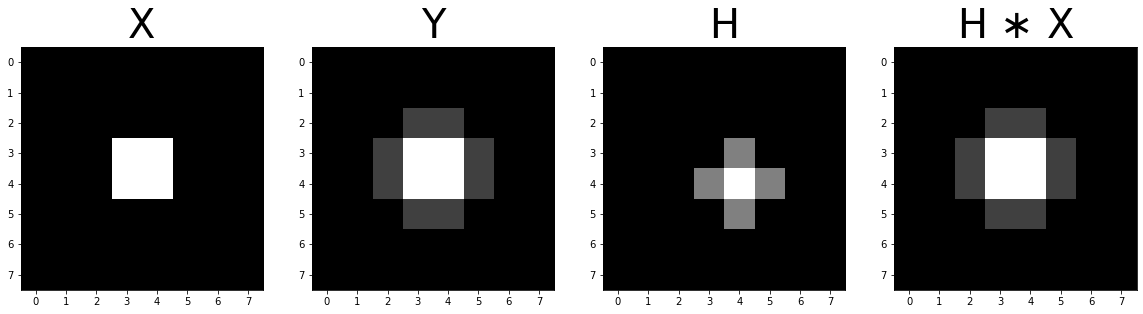

In [48]:
x = np.zeros((8,8))
x[3:5,3:5] = 1
y = np.zeros_like(x)
y[2:6,2:6] = np.array([[0,.25,.25,0],[.25,1,1,.25],[.25,1,1,.25],[0,.25,.25,0]])
h = np.zeros_like(x)
h[3:6,3:6] = np.array([[0,.25,0],[.25,.5,.25],[0,.25,0]])
y_prime = np.abs(fftshift(ifft2(fft2(x)*fft2(h))))
fsize = 40
plt.figure(figsize=(20,80))
plt.subplot(1,4,1)
plt.imshow(np.abs(x))
plt.title('X',fontsize=fsize)
plt.set_cmap(cmap="gray")
plt.subplot(1,4,2)
plt.imshow(np.abs(y))
plt.title('Y',fontsize=fsize)
plt.set_cmap(cmap="gray")
plt.subplot(1,4,3)
plt.imshow(np.abs(h))
plt.title('H',fontsize=fsize)
plt.set_cmap(cmap="gray")
plt.subplot(1,4,4)
plt.imshow(y_prime)
plt.title(r'H $\ast$ X',fontsize=fsize)
plt.set_cmap(cmap="gray")
assert np.isclose(np.sum(y_prime-y),0) 
print("Resultant convolution matches the given.")

# Q1b

In [49]:
H = h[3:6,3:6]
H

array([[0.  , 0.25, 0.  ],
       [0.25, 0.5 , 0.25],
       [0.  , 0.25, 0.  ]])

In [50]:
u = np.linalg.svd(H)
singular_values = u[1]
singular_values

array([6.83012702e-01, 1.83012702e-01, 1.27795495e-17])

 As can be seen above, we have 3 distinct singular values for the convolution kernel. For a kernel to be separable, it should be expressed as one outer product. However, when we use the SVD to decompose the matrix into outer products, we see that it has two nonzero singular values. One separable filter example can be seen below. The kernel is defined as an outer product and it has only one nonzero singular value. 

[1.61870000e+04 9.22945517e-13 2.22565261e-14]


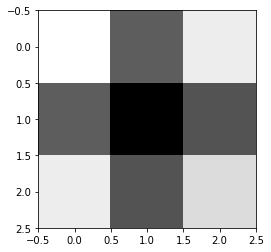

In [51]:
a = np.random.randint(0,100,(3,1))
b = np.outer(a,a)
u = np.linalg.svd(b)
singular_values = u[1]
print(singular_values)
plt.imshow(b)

# Q1d

$\begin{align} 
H(w_1,w_2) &= \sum\limits_{n_1=0}^2\sum\limits_{n_2=0}^2 h(n_1,n_2) e^{-jw_1n_1} e^{-jw_2n_2} \\ 
 &= \frac{1}{4}(e^{-jw_1}+e^{-jw_2}+e^{-jw_1}e^{-j2w_2}+e^{-j2w_1}e^{-jw_2}) + \frac{1}{4}(e^{-jw_1}e^{-jw_2}) \nonumber\\
 &= \frac{1}{4}e^{-jw_1}(1+e^{-j2w_2}) + \frac{1}{4}e^{-jw_2}(1+e^{-j2w_1}) + \frac{1}{2}(e^{-jw_1}e^{-jw_2}) \nonumber\\
 &= \frac{1}{4}e^{-jw_1}e^{-jw_2}(cos(\frac{w_1}{2})+cos(\frac{w_2}{2})) + \frac{1}{2} e^{-jw_1}e^{-jw_2} \nonumber\\
\end{align}$
$$\implies |H(w1,w2)| = \frac{1}{2} + cos(\frac{w_1}{2})+cos(\frac{w_2}{2})$$
<br/> This filter acts as low pass filter, since its magnitude have higher values around the origin. 

# Q1c
$\begin{align} 
H(k_1,k_2) &= \sum\limits_{n_1=0}^2\sum\limits_{n_2=0}^2 h(n_1,n_2) e^{-j{\frac{2\pi}{N_1}}k_1n_1} e^{-j{\frac{2\pi}{N_2}}k_2n_2} \\ 
\end{align}$
<br/> Since image has n1-n2 symmetry, its DFT has k1-k2 symmetry in the frequency domain, _i.e._ $H(k_1,k_2) = H(k_2,k_1)$

$\begin{align} 
H(0,0) &= \sum\limits_{n_1=0}^2\sum\limits_{n_2=0}^2 h(n_1,n_2)  = 1.5 \tag{1}\\ 
H(1,0) &= \sum\limits_{n_1=0}^2\sum\limits_{n_2=0}^2 h(n_1,n_2) e^{-j{\frac{2\pi n_1}{3}}} \tag{2}\\ 
&= (h(0,1)+h(0,2)+h(0,3)) + (h(1,0)+h(1,1)+h(1,2))e^{-j\frac{2\pi}{3}} + (h(2,1)+h(2,2)+h(3,2))e^{-j\frac{4\pi}{3}} \nonumber\\
&= \frac{1}{4} + e^{-j\frac{2\pi}{3}} + \frac{1}{4}e^{-j\frac{4\pi}{3}} \nonumber\\
H(0,1) &= H(1,0) \tag{3}\\
H(2,0) &= \sum\limits_{n_1=0}^2\sum\limits_{n_2=0}^2 h(n_1,n_2) e^{-j{\frac{4\pi n_1}{3}}} \tag{4}\\ 
&= (h(0,1)+h(0,2)+h(0,3)) + (h(1,0)+h(1,1)+h(1,2))e^{-j\frac{4\pi}{3}} + (h(2,1)+h(2,2)+h(3,2))e^{-j\frac{8\pi}{3}} \nonumber\\
&= \frac{1}{4} + e^{-j\frac{4\pi}{3}} + \frac{1}{4}e^{-j\frac{2\pi}{3}} \nonumber\\
H(0,2) &= H(2,0) \tag{5}\\
H(1,1) &= \sum\limits_{n_1=0}^2\sum\limits_{n_2=0}^2 h(n_1,n_2) e^{-j{\frac{2\pi (n_1+n_2)}{3}}} \tag{6}\\ 
&= \sum\limits_{n_2=0}^2 e^{-j{\frac{2\pi n_2}{3}}} \left( h(0,n_2) + h(1,n_2) e^{-j{\frac{2\pi}{3}}} + h(2,n_2) e^{-j{\frac{4\pi}{3}}} \right) \nonumber \\
&= 0 \ \ (See \ calculation \ below)\nonumber \\
H(2,2) &= \sum\limits_{n_1=0}^2\sum\limits_{n_2=0}^2 h(n_1,n_2) e^{-j{\frac{2\pi (2n_1+2n_2)}{3}}} \tag{7}\\ 
&= \sum\limits_{n_2=0}^2 e^{-j{\frac{4\pi n_2}{3}}}  \left( h(0,n_2) + h(1,n_2) e^{-j{\frac{2\pi}{3}}} + h(2,n_2) e^{-j{\frac{4\pi}{3}}} \right) \nonumber \\
&= 0 \ \ (See \ calculation \ below)\nonumber \\
\end{align}$


In [52]:
sum = 0
for n2 in range(3):
    sum += np.exp(-1j*2*pi*n2/3) * (h[0,n2] + h[1,n2] * np.exp(-1j*2*pi/3) + h[2,n2] * np.exp(-1j*4*pi/3))
print("H(1,1) =",sum)
sum = 0
for n2 in range(3):
    sum += np.exp(-1j*4*pi*n2/3) * (h[0,n2] + h[1,n2] * np.exp(-1j*2*pi/3) + h[2,n2] * np.exp(-1j*4*pi/3))
print("H(2,2) =",sum)
        

H(1,1) = 0j
H(2,2) = 0j


## Cross Term calculation example: 

In [53]:
(0.25 + 1*np.exp(-1j*2*pi/3) + 0.25*np.exp(-1j*4*pi/3))

(-0.3749999999999999-0.6495190528383291j)

In [54]:
fft2(H)

array([[ 1.5  -0.j        , -0.375-0.64951905j, -0.375+0.64951905j],
       [-0.375-0.64951905j,  0.   +0.j        ,  0.   -0.j        ],
       [-0.375+0.64951905j,  0.   +0.j        ,  0.   -0.j        ]])

As expected, we again obtained an low pass convolution filter. Higher frequency terms "at the edges" of the filter are zero, whereas center terms have higher magnitude. This is totally expected, since DFT is the sampled version of DTFT where $w = \frac{2\pi k}{N}$.

# Q1 e

In [55]:
def linear_conv_mat(h:np.array,output_size):
    L = h.size
    h_ex = np.zeros(output_size)
    h_ex[0:L] = h
    first_row = np.roll(np.flip(h_ex),1)
    return toeplitz(h_ex.T,first_row[0:(output_size-L+1)]) # H + X - 1 = output_size
    
def linear_conv2_mat(h:np.ndarray, image_shape):
    L1,L2 = image_shape
    N1,N2 = h.shape
    H = np.empty(((N1+L1-1)*(N2+L2-1),0))
    image_size = L1*L2
    for i in range(image_size):
        row = np.mod(i,L1)
        col = i//L1
        basis_vec = np.zeros((L1,L2))
        basis_vec[row,col] = 1
        basis_vec_output = convolve2d(h,basis_vec)
        H = np.column_stack((H, basis_vec_output.flatten()))
    return H 

In [56]:
for _ in range(50):
    N1 = np.random.randint(0,20)
    N2 = np.random.randint(0,20)
    L1 = np.random.randint(0,20)
    L2 = np.random.randint(0,20)
    H = np.random.randint(0,100,(N1,N2))
    x = np.random.randint(0,100,(L1,L2))
    H_mat = linear_conv2_mat(h=H,image_shape=x.shape)
    y_prime = convolve2d(H,x)
    y_prime_vec = H_mat.dot(x.flatten())
    y_prime_back = np.reshape(y_prime_vec,y_prime.shape,order="F")

    assert np.isclose(np.sum(y_prime-y_prime_back),0) # Check if they are the same 
print("linear_conv2_mat works")

linear_conv2_mat works


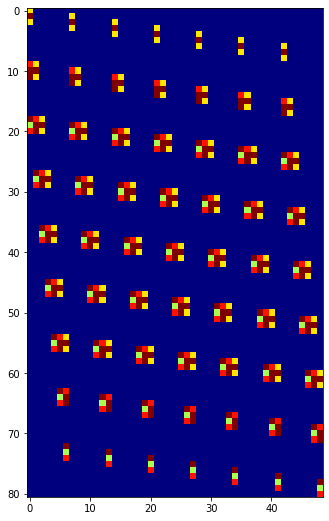

In [57]:
H = np.random.randint(5,10,(3,3))
x = np.random.randint(5,10,(7,7))
H_mat = linear_conv2_mat(h=H,image_shape=x.shape)
plt.figure(figsize=(18,9))
plt.imshow(H_mat,cmap="jet")

# Q1f 

Let the $i^{th}$ column of the image to convolved is called $x_i$. Then, the matrix product $Cx$ can be considered as "convolution with matrices $s_i$ and the vectors $x_i$".
Let the output image be y and the $i^{th}$ column of it is called $y_i$. Then: 

$$ y_i = \sum\limits_{k=0}^{L_2}s_{[i-k]}x_k $$

where $sk$ corresponds to the matrix-vector product with indices higher than $P_2$ and negative indices of s correspond to zero multiplication. Since $s$ matrix is a Toeplitz matrix, this product is equal to a convolution with a vector which circulates in the columns of this Toeplitz matrix, _i.e._ the columns of the filter kernel.  


In [58]:
def conv2_by_fft(x:np.ndarray, h:np.ndarray):
    if h.shape[0] > x.shape[0] and h.shape[1] > x.shape[1]:
        x,h = h,x
    L1,L2 = x.shape
    P1,P2 = h.shape
    rows = L1+P1-1
    cols = L2+P2-1
    Y = np.empty((rows,cols))
    for i in range(cols):
        output_col = np.zeros((rows,))
        for p in range(L2): # travel through image columns
            if i-p >= 0 and i-p < P2:
                product = np.multiply(fft(x[:,p],rows),fft(h[:,i-p],rows)) # splitted lines for debugging
                output_col += np.real(ifft(product))
                Y[:,i] = output_col
    return Y
        

## Test the function

In [59]:
for _ in range(1500):
    L1 = np.random.randint(3,15)
    L2 = np.random.randint(3,15)
    N1 = np.random.randint(1,L1-1)
    N2 = np.random.randint(1,L2-1)
    H = np.random.randint(0,100,(N1,N2))
    x = np.random.randint(0,100,(L1,L2))
    y = conv2_by_fft(x,H)
    y_prime = convolve2d(x,H)
    assert np.isclose(np.sum(y_prime-y),0) # Check if they are the same 
print("conv2_by_fft works")

conv2_by_fft works


# Q1g <br/>
The energy of the signal is defined as $$\sum\limits_{n=0}^{\infty}x^2[n]$$ <br/>
Using Parsevals relation, one can write $$\sum\limits_{n=0}^{\infty}x^2[n] = \sum\limits_{k=0}^{\infty}X^2[k]$$ where $X(k)$ is the DFT of $x[n]$. The same relation is also valid for 2D signals. <br/> <br/>

$\begin{align}
y[m,n] &= h[m,n] \ast\ast \ x[m,n] \tag{1}\\
Y[k,l] &= H[k,l]  \ X[k,l] \tag{2}\\
E_x &= \sum\limits_k\sum\limits_l X^2[k,l] \tag{3}\\
E_y &= \sum\limits_k\sum\limits_l Y^2[k,l] = \sum\limits_k\sum\limits_l H^2[k,l] X^2[k,l] \tag{4}
\end{align}$
<br/>
To have $E_x = E_y$, right hand side of Eqn. 4 should be normalized with $\tfrac{E_x}{E_y}$, which corresponds to replacing filter $H[k,l]$ with $\sqrt{\tfrac{E_x}{E_y}}H[k,l].$

Energy ratio: 0.004278659326852085


Text(0.5, 1.0, 'Blurred image with \n normalized kernel \n (energy)')

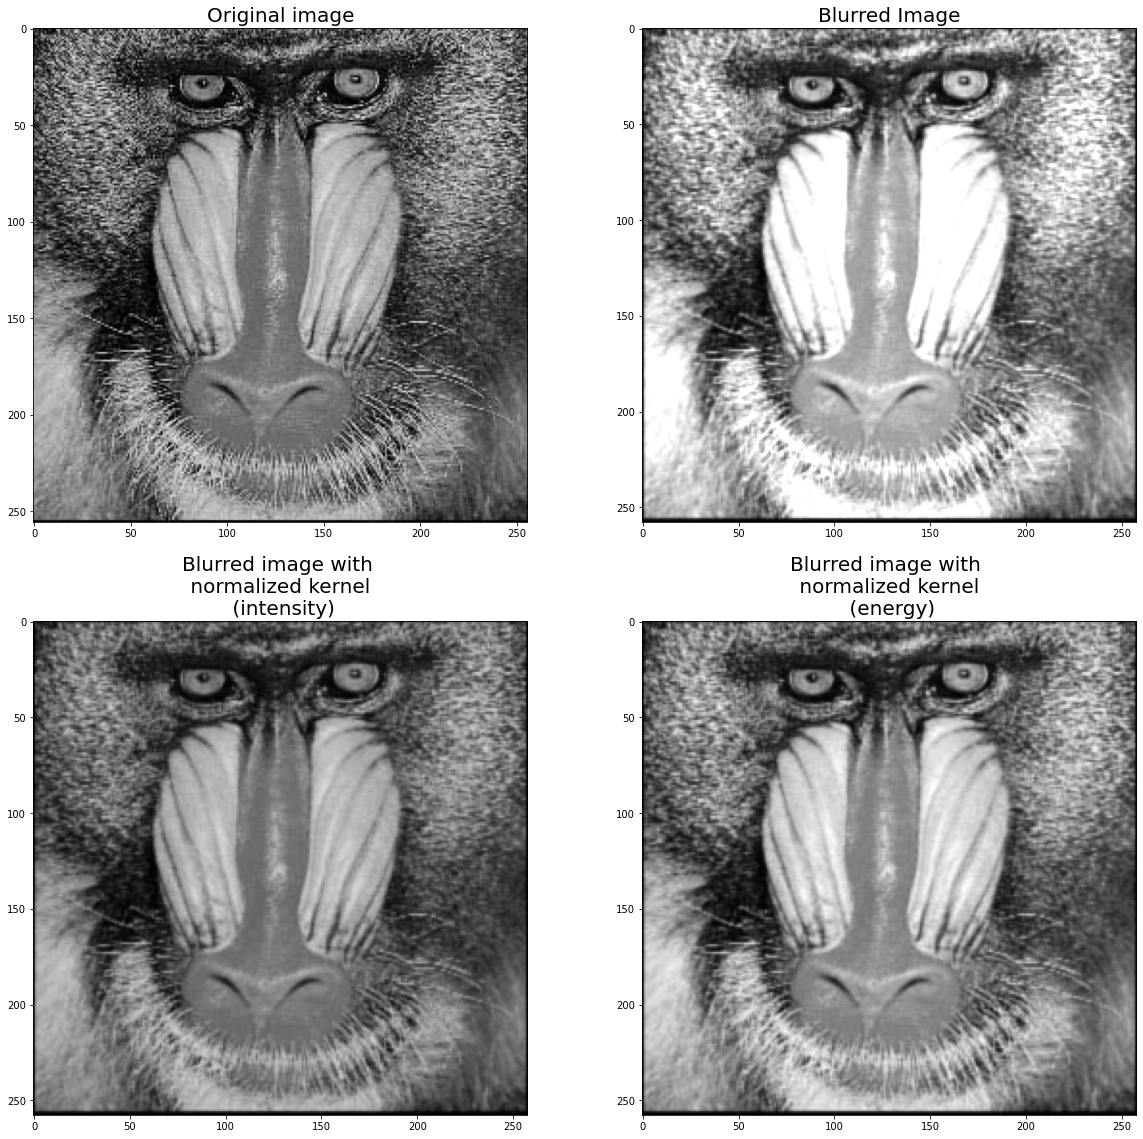

In [60]:
image = plt.imread("mandrill.bmp")
h = np.array([[0,.25,0],[.25,.5,.25],[0,.25,0]])
blurred_image = conv2_by_fft(h,image)
E_x = np.trace(image.conj().T.dot(image))
E_y = np.trace(blurred_image.conj().T.dot(blurred_image))
print("Energy ratio:",np.sqrt(E_x/E_y))
modified_h = np.sqrt(E_x/E_y) * h
plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
plt.imshow(image)
plt.title("Original image",fontsize=20)
plt.subplot(2,2,2)
plt.imshow(blurred_image,vmin=np.min(image), vmax=np.max(image))
blurred_image_normalized_intesity = conv2_by_fft(h/np.sum(h),image) # Done normalization for intensity by DC component 
blurred_image_normalized_energy = conv2_by_fft(modified_h,image)
plt.title("Blurred Image",fontsize=20)
plt.subplot(2,2,3)
plt.imshow(blurred_image_normalized_intesity,vmin=np.min(image), vmax=np.max(image))
plt.title("Blurred image with \n normalized kernel \n (intensity)",fontsize=20)
plt.subplot(2,2,4)
plt.imshow(blurred_image_normalized_energy,vmin=np.min(blurred_image_normalized_energy), vmax=np.max(blurred_image_normalized_energy))
plt.title("Blurred image with \n normalized kernel \n (energy)",fontsize=20)


In the last image, we observe that the hairy part of the cheeks of the mandrill got blurred and is not distinctive as it is in the original image anymore.  

# Q2

Text(0, 0.5, '$f_2$')

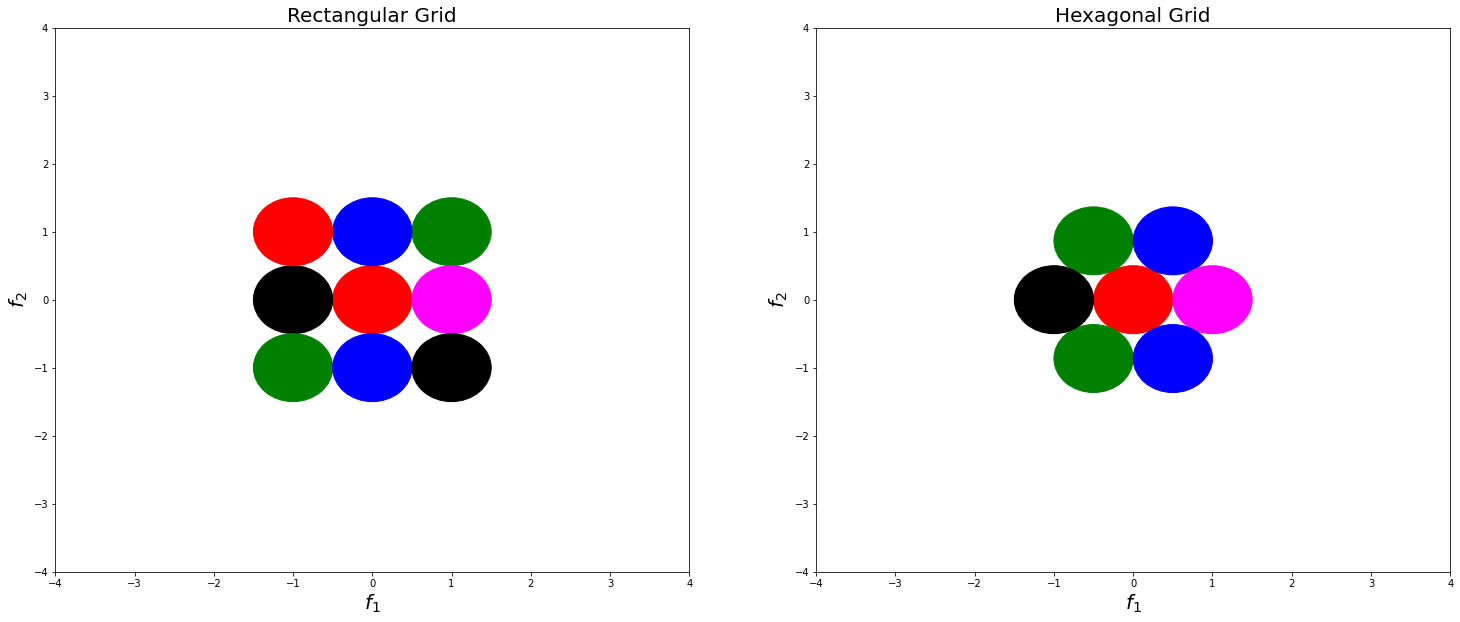

In [61]:
plt.figure(figsize=(25,10))

plt.subplot(1,2,1)
ax = plt.gca()
ax.cla() # clear things for fresh plot
circle1 = plt.Circle((0, 0), .5, color='r')
circle2 = plt.Circle((1, 1), .5, color='g')
circle3 = plt.Circle((0, 1), .5, color='b')
circle4 = plt.Circle((1, 0), .5, color='magenta')
circle5 = plt.Circle((-1, 0), .5, color='k')
circle6 = plt.Circle((-1, -1), .5, color='g')
circle7 = plt.Circle((0, -1), .5, color='b')
circle8 = plt.Circle((1, -1), .5, color='k')
circle9 = plt.Circle((-1, 1), .5, color='r')
# change default range so that new circles will work
ax.set_xlim((-4, 4))
ax.set_ylim((-4, 4))
ax.add_patch(circle1)
ax.add_patch(circle2)
ax.add_patch(circle3)
ax.add_patch(circle4)
ax.add_patch(circle5)
ax.add_patch(circle6)
ax.add_patch(circle7)
ax.add_patch(circle8)
ax.add_patch(circle9)
plt.title("Rectangular Grid",fontsize=20)
plt.xlabel(r'$f_1$',fontsize=20)
plt.ylabel(r'$f_2$',fontsize=20)


plt.subplot(1,2,2)
ax = plt.gca()
ax.cla() # clear things for fresh plot
circle1 = plt.Circle((0, 0), .5, color='r')
circle2 = plt.Circle((-0.5, 0.5*np.sqrt(3)), .5, color='g')
circle3 = plt.Circle((0.5, 0.5*np.sqrt(3)), .5, color='b')
circle4 = plt.Circle((1, 0), .5, color='magenta')
circle5 = plt.Circle((-0.5, -0.5*np.sqrt(3)), .5, color='g')
circle6 = plt.Circle((0.5, -0.5*np.sqrt(3)), .5, color='b')
circle7 = plt.Circle((-1, 0), .5, color='k')
# change default range so that new circles will work
ax.set_xlim((-4, 4))
ax.set_ylim((-4, 4))
ax.add_patch(circle1)
ax.add_patch(circle2)
ax.add_patch(circle3)
ax.add_patch(circle4)
ax.add_patch(circle5)
ax.add_patch(circle6)
ax.add_patch(circle7)
plt.title("Hexagonal Grid",fontsize=20)
plt.xlabel(r'$f_1$',fontsize=20)
plt.ylabel(r'$f_2$',fontsize=20)



To recover the signal exactly from the frequency spectrum, we should conduct sampling avoiding aliasing. The minimum sampling frequency for this in regular grid turned out to be 1 $cycles/meter$, that is maximum 1 meter period. The most efficient sampling grid that we can utilize for circular support functions is the hexagonal grid. It corresponds to the sampling matrix V in the frequency domain where 
$$V = \begin{bmatrix}\tfrac{1}{2} & \tfrac{-\sqrt{3}}{2} \\ \tfrac{1}{2} & \tfrac{\sqrt{3}}{2} \end{bmatrix}$$
The sampling grid in space is given by $$V^{-T} = \begin{bmatrix} 1 & 1 \\ \tfrac{1}{\sqrt{3}} & -\tfrac{1}{\sqrt{3}} \end{bmatrix}$$

# Q3a

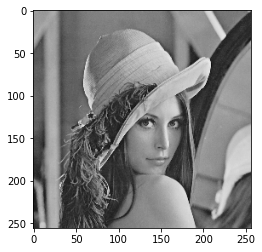

In [62]:
from skimage.color import rgb2gray
image = plt.imread("256by256grayscaleLena.png")
image = rgb2gray(image[...,1:4])
minsize = 0
maxsize = image.shape[1]
X = np.arange(minsize, maxsize, 1)
Y = np.arange(minsize, maxsize, 1)
X, Y = np.meshgrid(X, Y)
plt.imshow(image,cmap="gray")

Text(0.5, 0.92, 'Centered DFT')

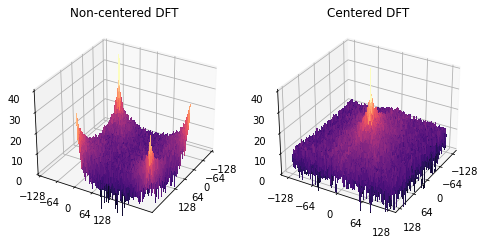

In [63]:
# Plot the surface.
fig = plt.figure(figsize=plt.figaspect(.5))
ax = fig.add_subplot(1, 2, 1, projection='3d')
surf = ax.plot_surface(X, Y, 10*np.log10(np.abs(fft2(image))),rstride=1, 
    cstride=1, cmap=cm.magma, linewidth=0, antialiased=False)
ax.set_zlim(0,40)
ax.view_init(30, 30)
ax.set_xticks(np.linspace(-128,128,5))
ax.set_yticks(np.linspace(-128,128,5))
plt.title("Non-centered DFT")

ax = fig.add_subplot(1, 2, 2, projection='3d')
surf = ax.plot_surface(X-128, Y-128, 10*np.log10(np.abs(fftshift(fft2(image)))),rstride=1, 
    cstride=1, cmap=cm.magma, linewidth=0, antialiased=False)
ax.set_zlim(0,40)
ax.view_init(30, 30)
ax.set_xticks(np.linspace(-128,128,5))
ax.set_yticks(np.linspace(-128,128,5))
plt.title("Centered DFT")



# Q3b 

Take the image and upsample with zeroes in every 2 elements.

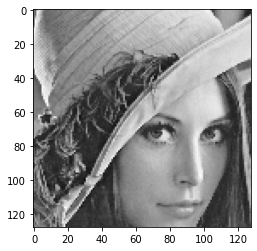

In [64]:
cropped_image = image[60:188,60:188]
plt.imshow(cropped_image)

Calculate its 2D Fourier transform.

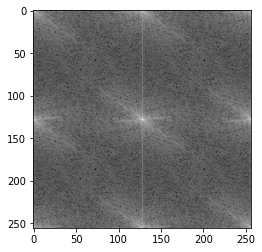

In [65]:
s1,s2 = cropped_image.shape
upsampled_image = np.zeros((2*s1,2*s2))
upsampled_image[::2,::2] = cropped_image
FFT_upsampled = fft2(upsampled_image)
plt.imshow(np.log10(np.abs(FFT_upsampled)))

Filter the "central" portion of the frequency spectrum out with an ideal low pass filter.  

C:\Users\Kutay\AppData\Local\Temp/ipykernel_15656/1597208387.py:6: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(np.abs(Filtered_FFT)))


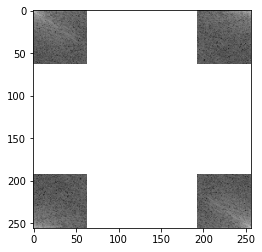

In [66]:
## Take the center portion, equate remaining to 0 
shifted = fftshift(FFT_upsampled)
Filtered_FFT = np.zeros_like(FFT_upsampled)
Filtered_FFT[64:192,64:192] = FFT_upsampled[64:192,64:192]
Filtered_FFT = fftshift(Filtered_FFT)
plt.imshow(np.log10(np.abs(Filtered_FFT)))

Take the inverse 2D FFT to obtain the interpolated image. 

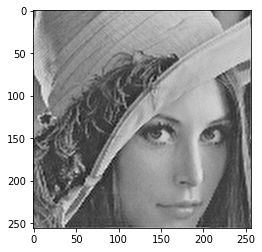

In [67]:
interpolated_image = np.real(ifft2(Filtered_FFT))
plt.imshow(interpolated_image)